# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar data cleaning and preparation as we did in the FTE. Specifically, at least complete these minimum requirements:

- Check for outliers in numeric data using an IRQ method, and deal with them if needed
- Check for missing values, and decide how to deal with them if needed. Think about how to deal with missing values before dealing with them.
- Convert categorical columns to numeric values
- Create at least one new feature by combining multiple columns. Create at least one plot for your new feature.
- Perform a log transformation on at least one column. Create at least one plot of your new log column.
- Save the data to a csv (or another filetype of your choice) for use next week.
- Write a short analysis 5 to 10 sentances at the end of the notebook describing your findings and what you did.

You can do more data cleaning, preparation, and EDA beyond these basic requirements if you want to learn more and develop your data science skills. For example, you could use a box-cox transformation on the numeric data or try other outlier methods.

### DS process status

Here is our data science process, and where we are (#3):

**1. Business understanding**

Can we use machine learning to predict if a customer will churn before they leave?

**2. Data understanding**

Done in week 1 (mostly), this is iterative so you might do more of this as we go on.

**3. Data preparation**

We are here this week.


**4. Modeling**

Next week


**5. Evaluation**

Next week


**6. Deployment**

Next week

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/churn_data.csv')
df.tail()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,66,Yes,Two year,Bank transfer (automatic),105.65,6844.50,No


In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
df['TotalCharges'].mean()

2283.3004408418656

In [ ]:
df['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


#Filtering data

In [ ]:
churn_df=df[df['Churn']=='Yes']
churn_df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Electronic check,99.65,820.50,Yes
8,7892-POOKP,28,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,49,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,12,Yes,One year,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,9,Yes,Month-to-month,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,1,Yes,Month-to-month,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,67,Yes,Month-to-month,Credit card (automatic),102.95,6886.25,Yes


In [ ]:
total_chargesdf=df[df['TotalCharges']>2283.300441]
total_chargesdf

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,28,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,62,Yes,One year,Bank transfer (automatic),56.15,3487.95,No
12,8091-TTVAX,58,Yes,One year,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,49,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,25,Yes,Month-to-month,Electronic check,105.50,2686.05,No
...,...,...,...,...,...,...,...,...
7031,3605-JISKB,55,Yes,One year,Credit card (automatic),60.00,3316.10,No
7033,9767-FFLEM,38,Yes,Month-to-month,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,67,Yes,Month-to-month,Credit card (automatic),102.95,6886.25,Yes
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No


In [ ]:
total_chargesdf=df[df['TotalCharges']>df['TotalCharges'].mean()]
total_chargesdf

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,28,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,62,Yes,One year,Bank transfer (automatic),56.15,3487.95,No
12,8091-TTVAX,58,Yes,One year,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,49,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,25,Yes,Month-to-month,Electronic check,105.50,2686.05,No
...,...,...,...,...,...,...,...,...
7031,3605-JISKB,55,Yes,One year,Credit card (automatic),60.00,3316.10,No
7033,9767-FFLEM,38,Yes,Month-to-month,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,67,Yes,Month-to-month,Credit card (automatic),102.95,6886.25,Yes
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No


#Checking for outliers and dealing with them

Text(0.5, 1.0, 'Box Plot Example')

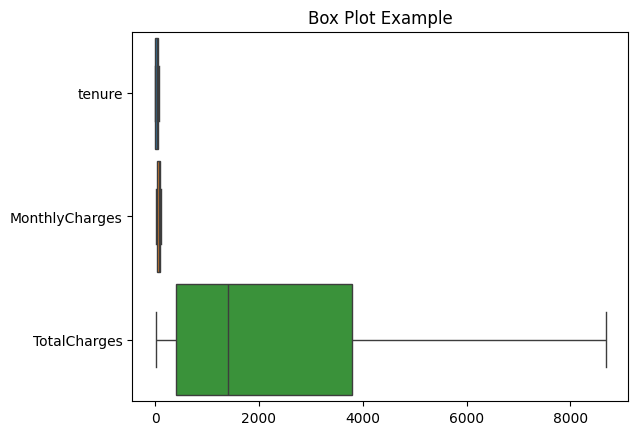

In [ ]:
ax = sns.boxplot(data=df, orient='h',width=0.9)
plt.title("Box Plot Example")
#keep heading for images

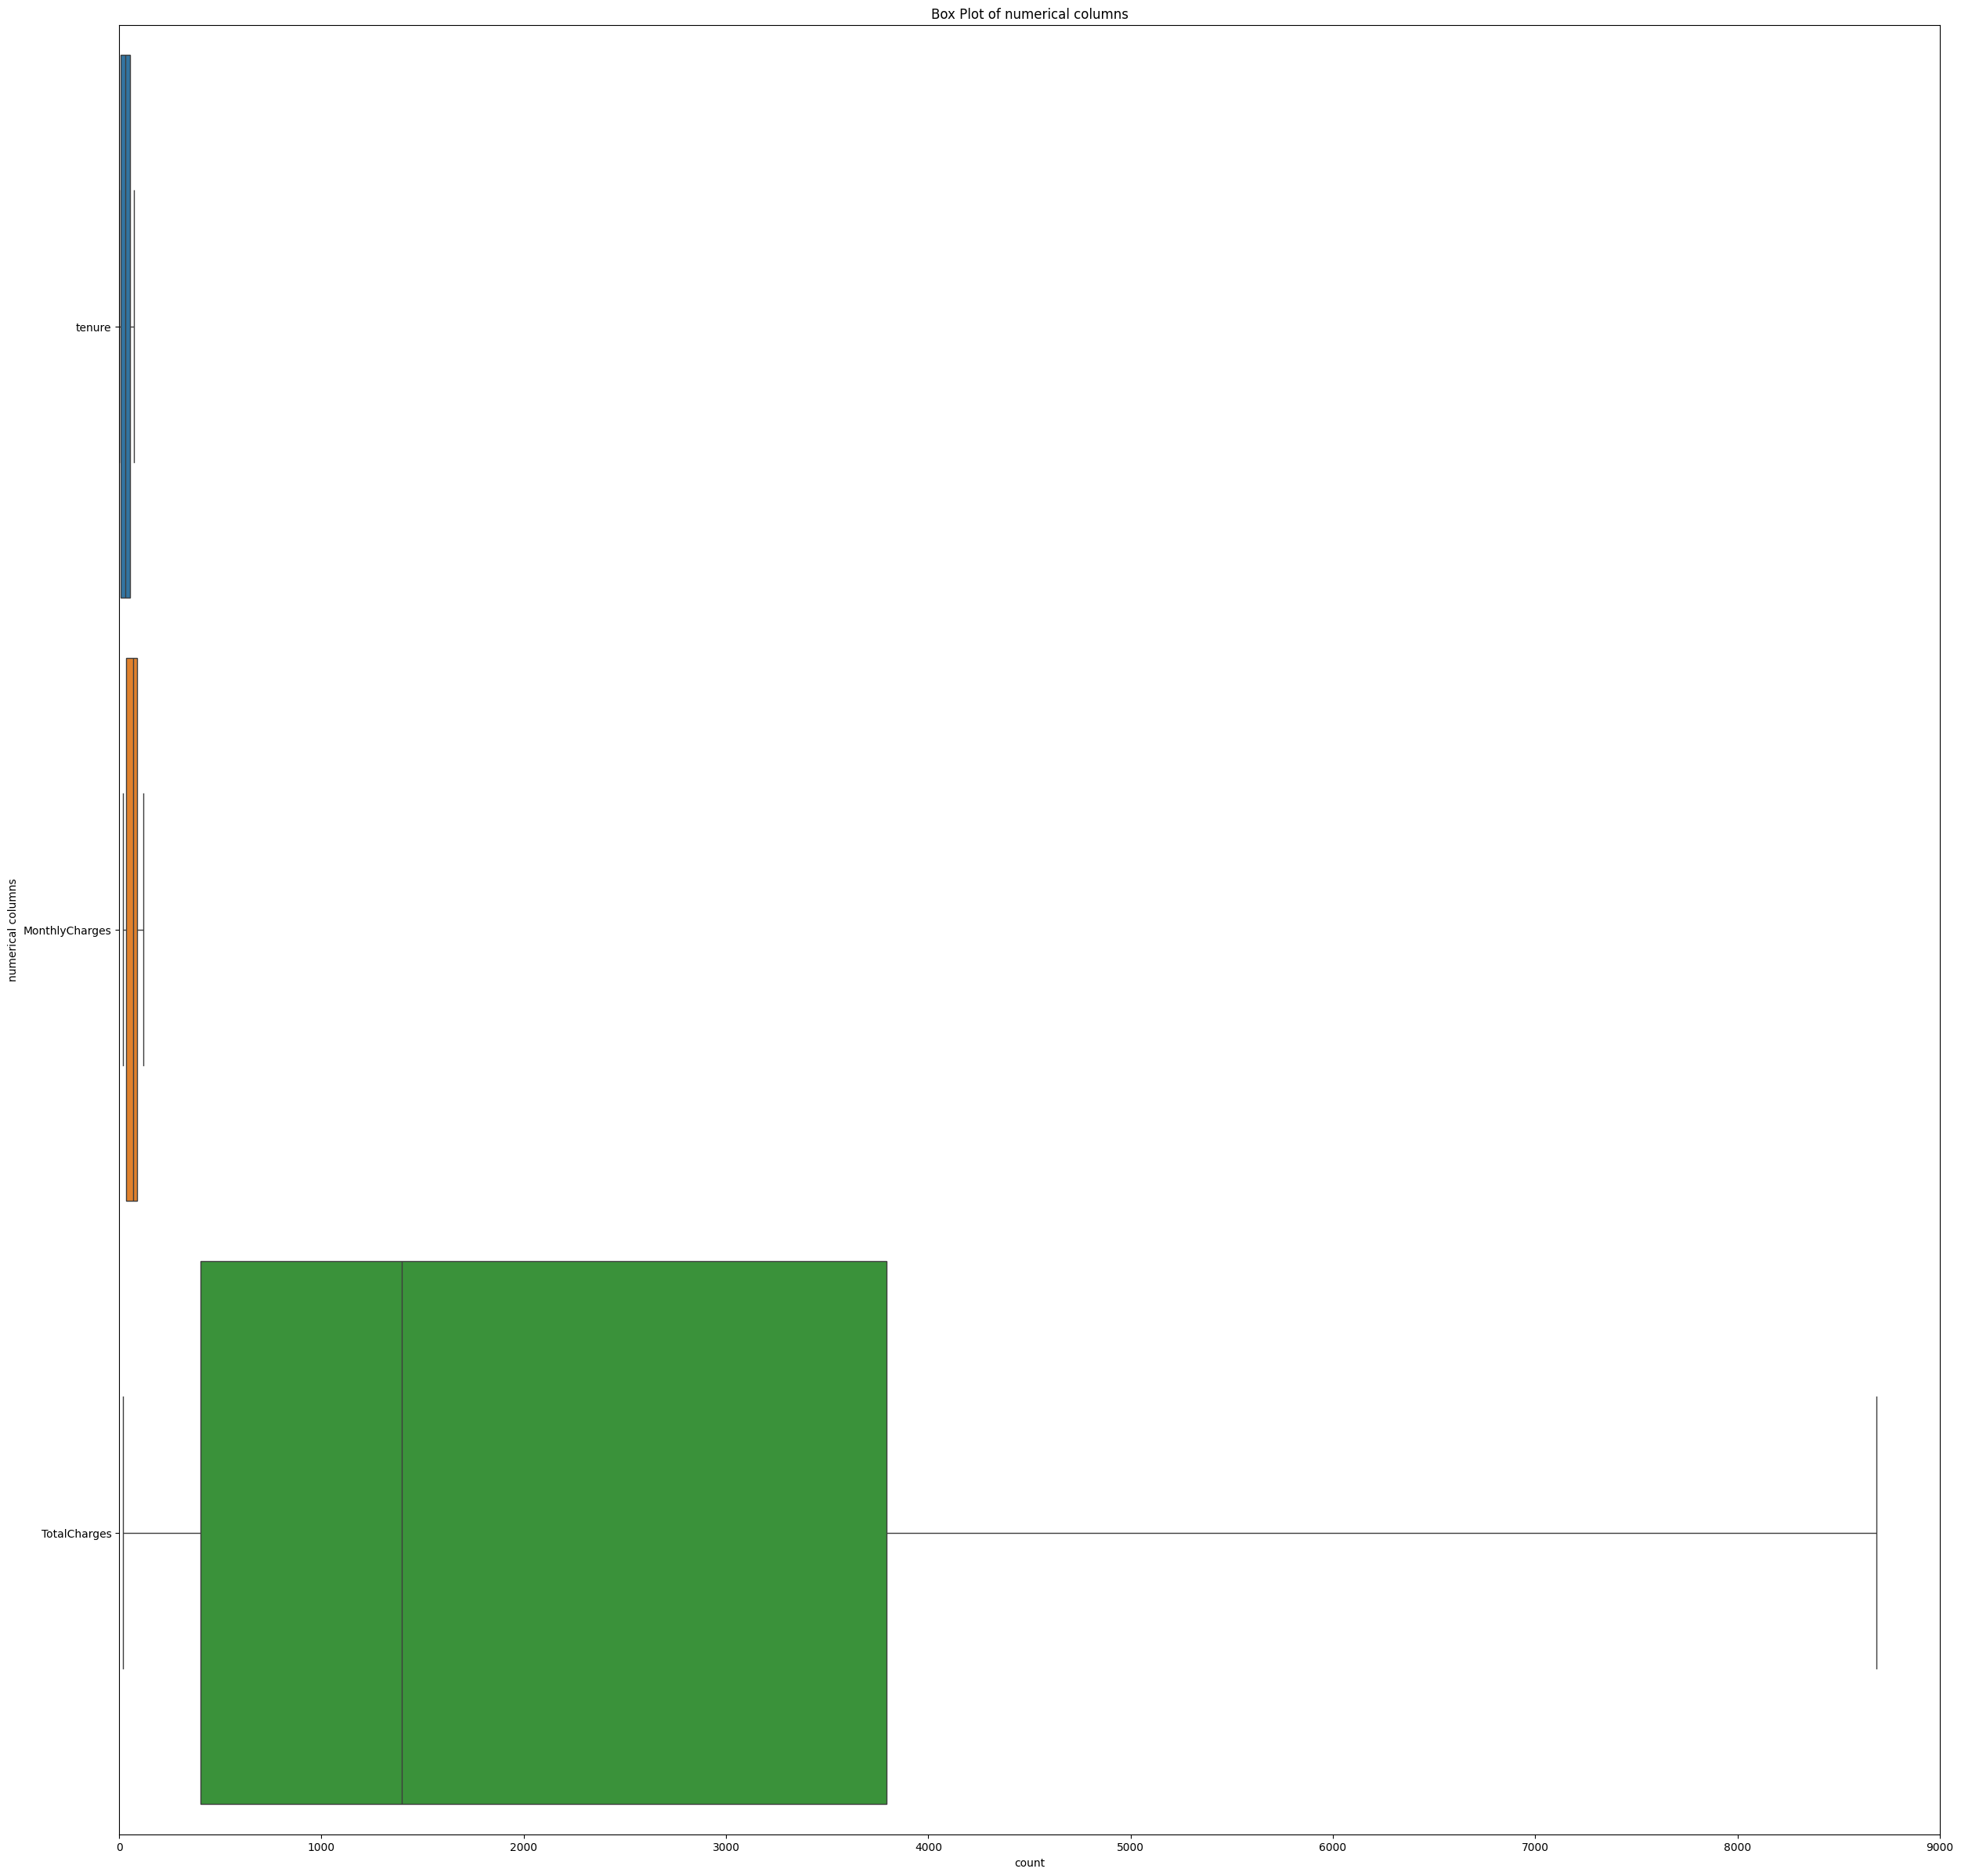

In [ ]:

plt.figure(figsize=(30, 30))
ax = sns.boxplot(data=df, orient='h',width=0.9,linewidth=1)
plt.xlim(0,9000)
plt.title("Box Plot of numerical columns")
plt.xlabel("count")
plt.ylabel("numerical columns")
plt.show()


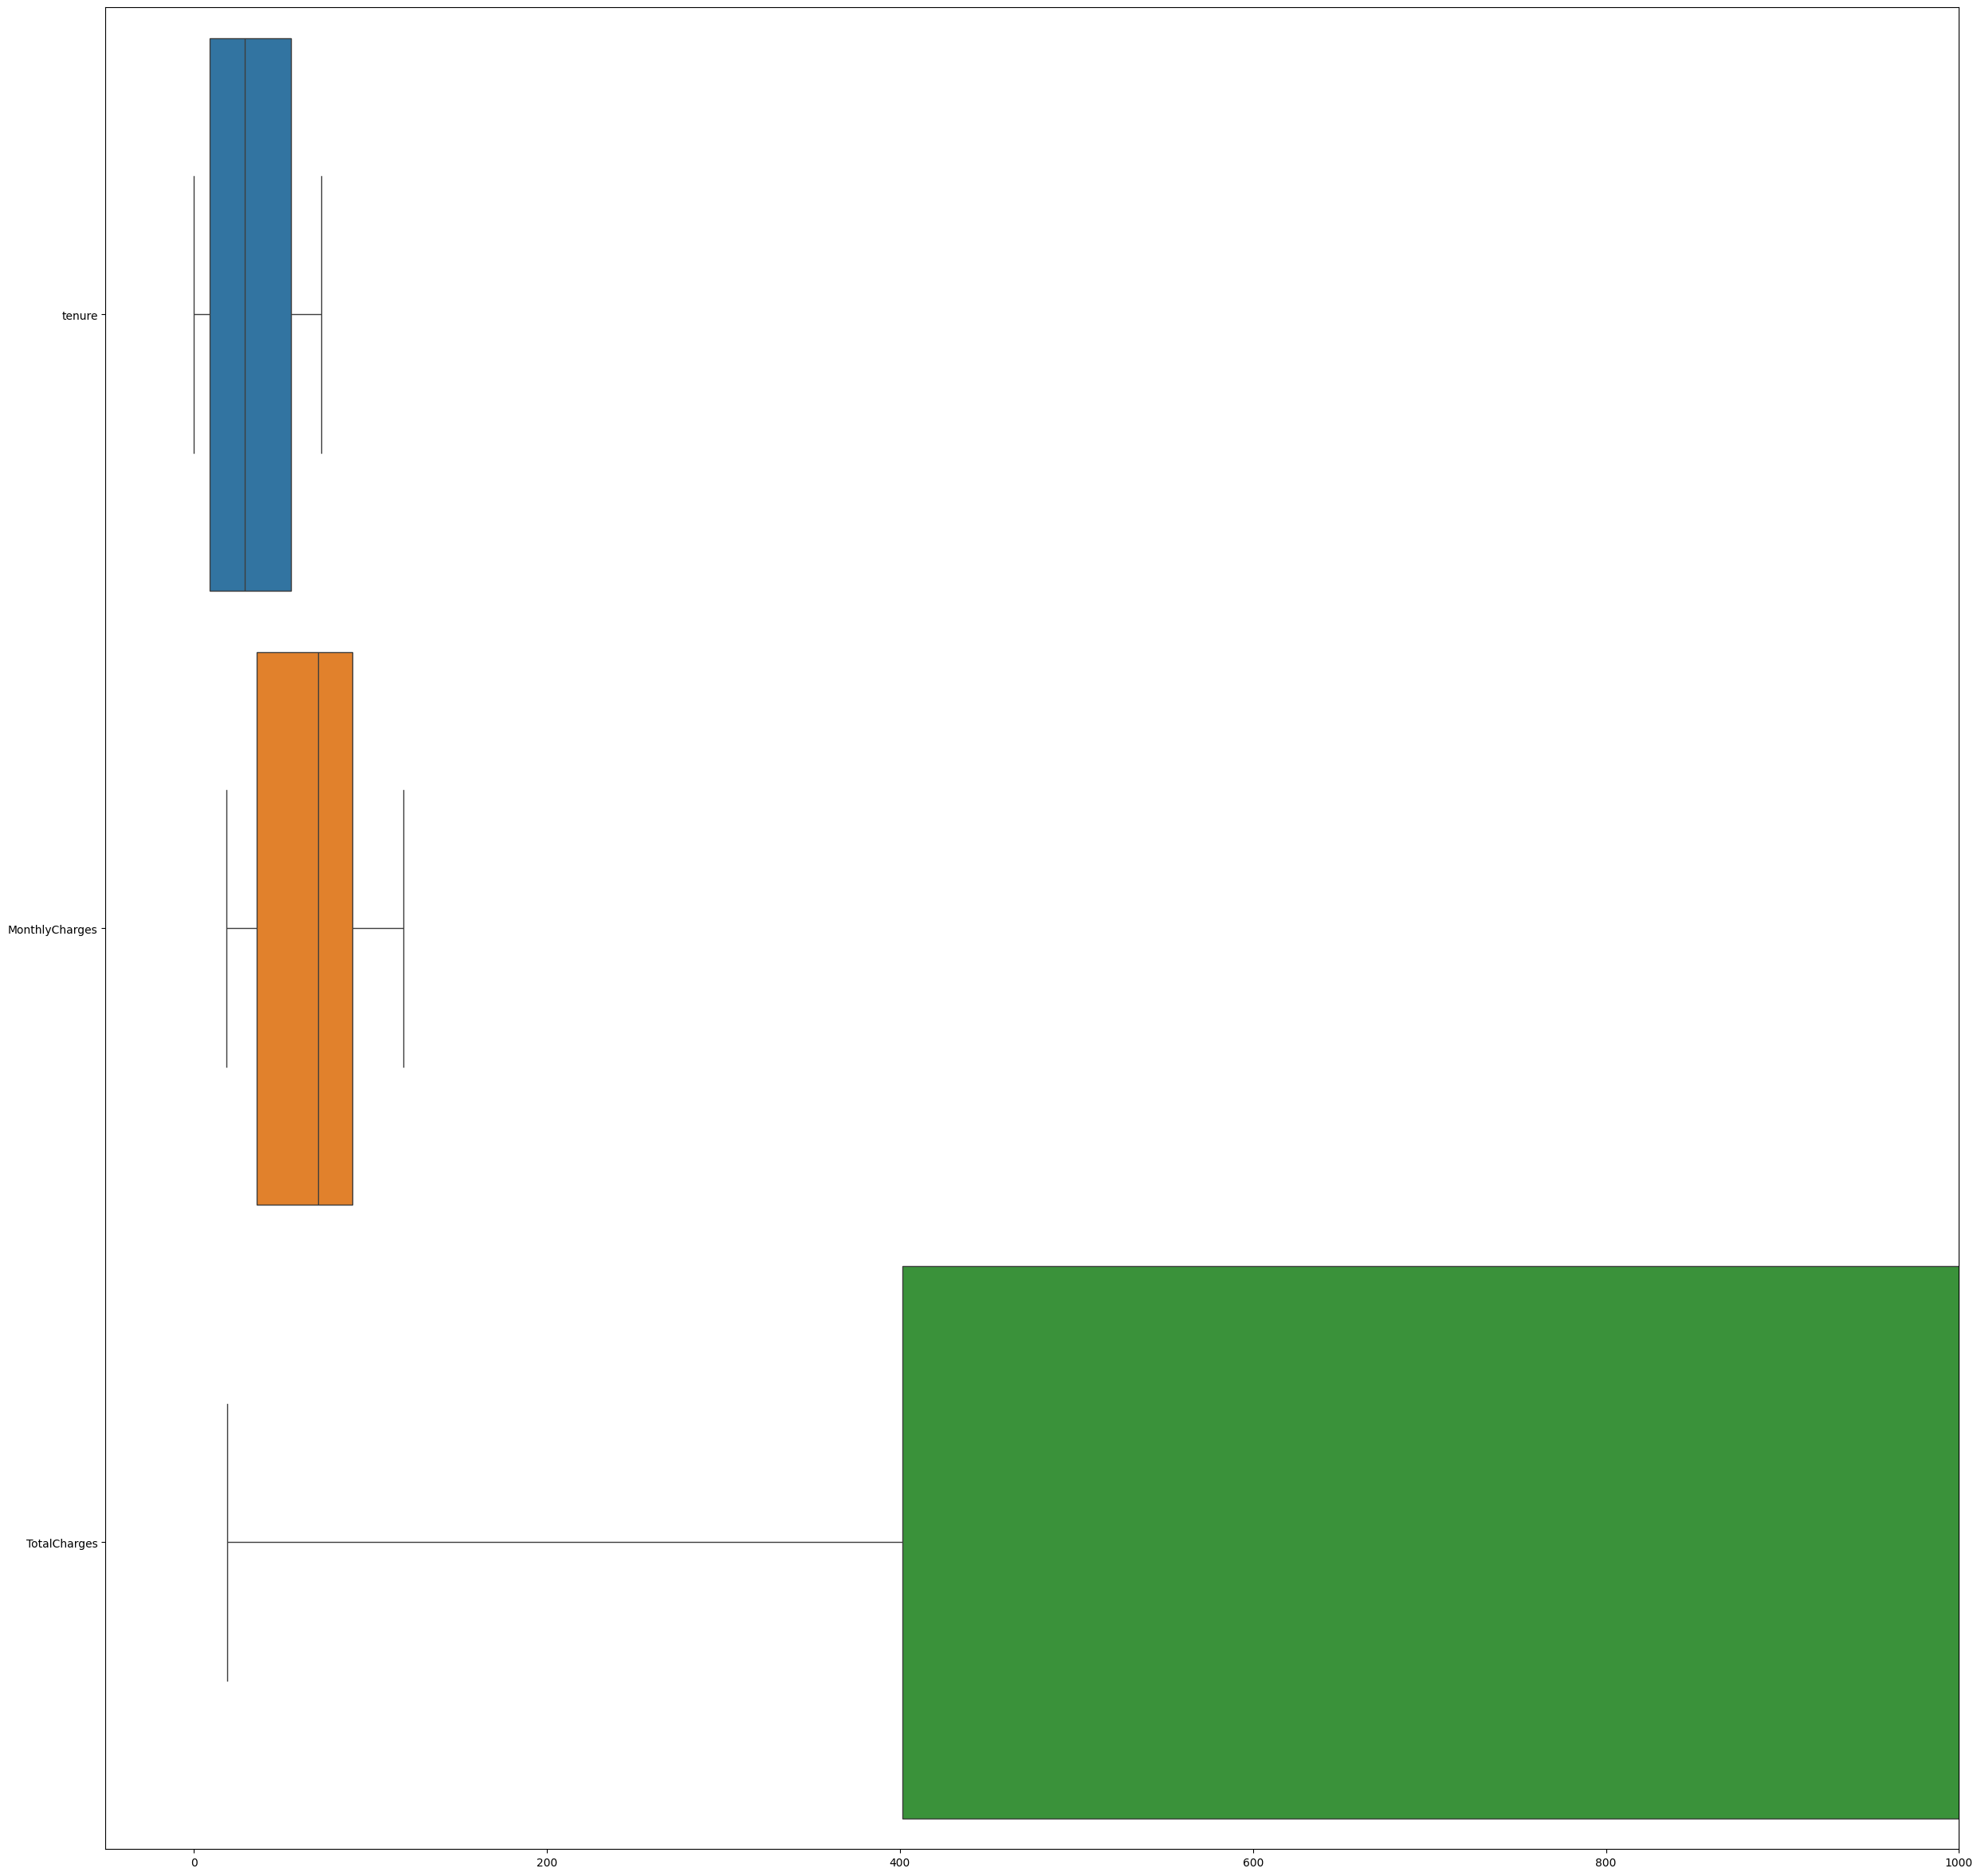

In [ ]:

plt.figure(figsize=(30, 30))
ax = sns.boxplot(data=df, orient='h',width=0.9,linewidth=1)
plt.xlim(-50,1000)
plt.title("Box Plot Example")
plt.show()

Text(0.5, 1.0, 'Box Plot Example')

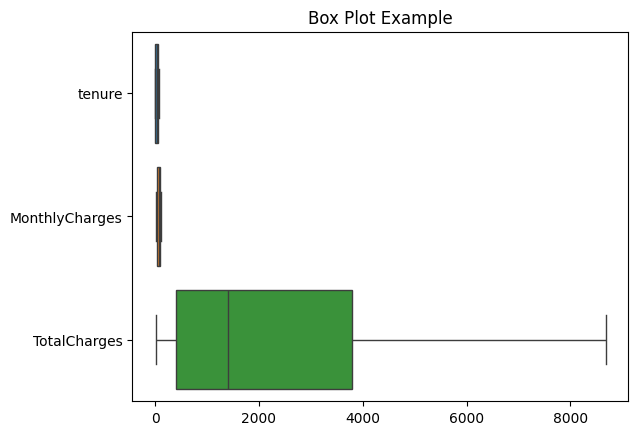

In [ ]:

df_copy=df.copy()
for column in df.select_dtypes (include=[int, float]).columns:
  q1= df [column].quantile(0.25)
  q3=df [column].quantile (0.75)
  iqr = q3-q1
  upper_boundary =q3+ 1.5*iqr
  lower_boundary =q1 -1.5*iqr
  df [(df [column]<lower_boundary) | (df [column]> upper_boundary)] [column]
  df_copy.loc[(df [column]< lower_boundary), column] = np.nan
  df_copy.loc[df [column]> upper_boundary, column] = np.nan
sns.boxplot(data=df_copy, orient='h')
plt.title("Box Plot Example")

Here we dont have any outliers

#Missing values

In [ ]:
df.isnull().sum()

,0
customerID,0
tenure,0
PhoneService,0
Contract,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,11
Churn,0


THere are 11 missing values in total charges

In [8]:
df11=df.copy()

Here i am replacing the null total charges with median

In [9]:
df11['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
df11.isnull().sum()

,0
customerID,0
tenure,0
PhoneService,0
Contract,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,0
Churn,0


#Converting categorical variables to numeric

In [6]:
df1=df.copy()

In [7]:
df1['Churn'] = df1['Churn'].replace({'No': 0, 'Yes': 1})

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7032 non-null   float64
 7   Churn           7043 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 440.3+ KB


In [31]:
df1['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [32]:
df1['Contract'] = df1['Contract'].replace({'Month-to-month': 0, 'Two year': 1, 'One year': 2})

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   int64  
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7032 non-null   float64
 7   Churn           7043 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 440.3+ KB


In [34]:
df1['Contract'].value_counts()

,count
Contract,
0,3875
1,1695
2,1473


#Feature engineering - combining features

In [5]:
df_chg_tenure=df.copy()

In [39]:
df_chg_tenure.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


In [11]:
df_chg_tenure['total_charges_tenure']=df_chg_tenure['TotalCharges']/df_chg_tenure['tenure']

Text(0.5, 1.0, 'Histogram of Totalcharges/Tenure')

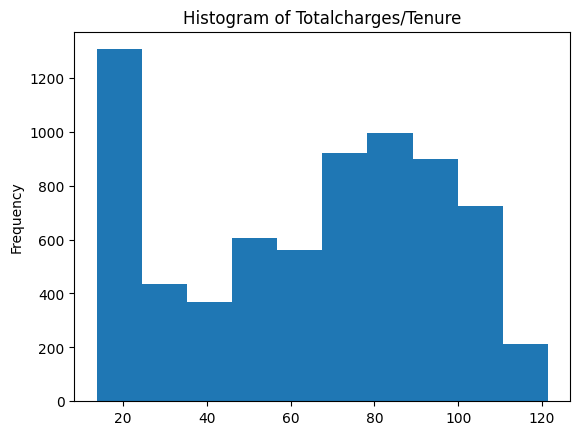

In [50]:
df_chg_tenure['total_charges_tenure'].plot.hist()
plt.title("Histogram of Totalcharges/Tenure")

Text(0.5, 1.0, 'Histogram of Monthlycharges')

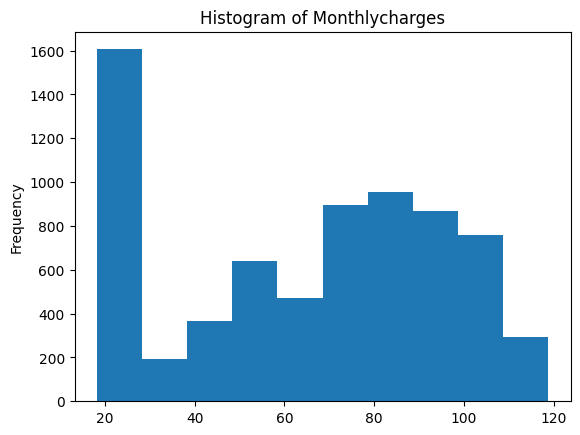

In [49]:
df['MonthlyCharges'].plot.hist()
plt.title("Histogram of Monthlycharges")

In [12]:
df_chg_tenure['monthly_charges_tenure']=df_chg_tenure['MonthlyCharges']*df['tenure']

Text(0.5, 1.0, 'Histogram of Monthlycharges*Tenure')

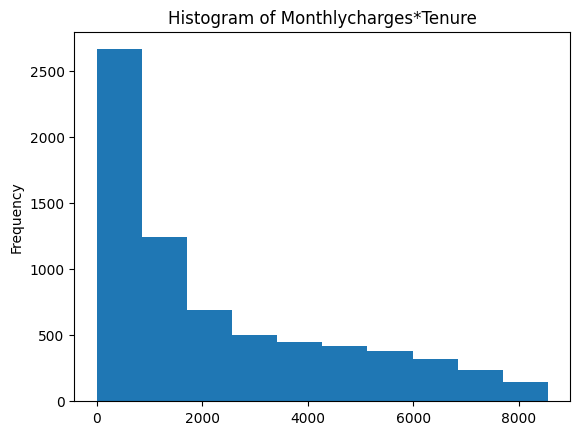

In [48]:
df_chg_tenure['monthly_charges_tenure'].plot.hist()
plt.title("Histogram of Monthlycharges*Tenure")

Text(0.5, 1.0, 'Histogram of Totalcharges')

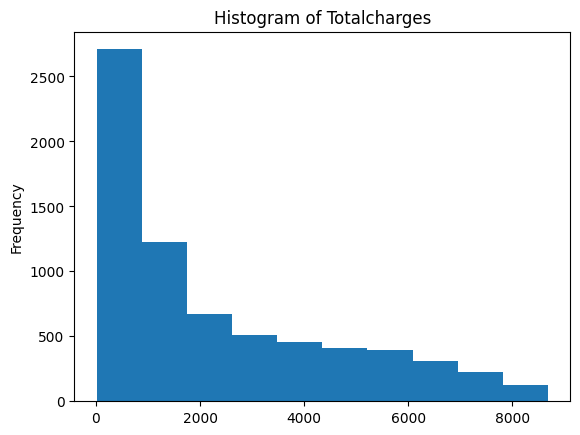

In [47]:
df['TotalCharges'].plot.hist()
plt.title("Histogram of Totalcharges")

In [ ]:
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
df_chg_tenure['monthly_charges_tenure']

,monthly_charges_tenure
0,29.85
1,1936.30
2,107.70
3,1903.50
4,141.40
...,...
7038,2035.20
7039,7430.40
7040,325.60
7041,297.60


In [ ]:
#save the file as well

In [ ]:
df_chg_tenure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7043 non-null   object 
 1   tenure                  7043 non-null   int64  
 2   PhoneService            7043 non-null   object 
 3   Contract                7043 non-null   object 
 4   PaymentMethod           7043 non-null   object 
 5   MonthlyCharges          7043 non-null   float64
 6   TotalCharges            7032 non-null   float64
 7   Churn                   7043 non-null   object 
 8   total_charges_tenure    7032 non-null   float64
 9   monthly_charges_tenure  7043 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 550.4+ KB


#log transformation on monthly charges

In [6]:
import numpy as np


df_chg_tenure['MonthlyCharges_log'] = np.log(df_chg_tenure['MonthlyCharges'])

Text(0.5, 1.0, 'Histogram of log transformation of  monthlycharges')

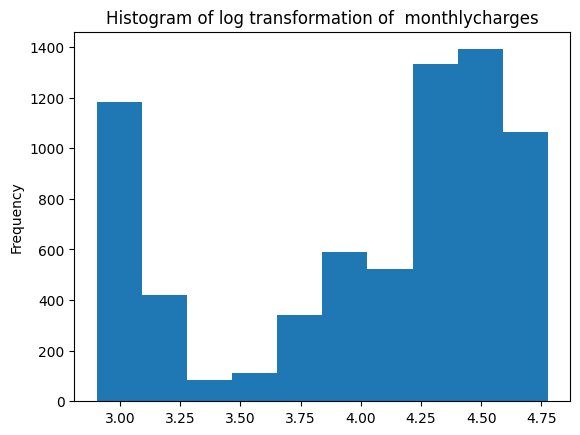

In [10]:
df_chg_tenure['MonthlyCharges_log'].plot.hist()
plt.title("Histogram of log transformation of  monthlycharges")

Text(0.5, 1.0, 'Histogram of monthlycharges')

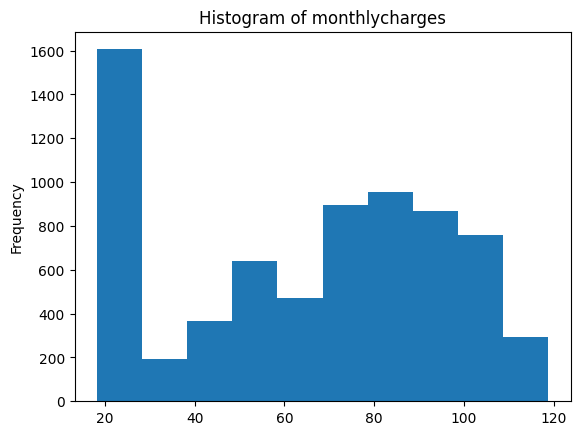

In [9]:
df_chg_tenure['MonthlyCharges'].plot.hist()
plt.title("Histogram of monthlycharges")

In [13]:
df_chg_tenure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7043 non-null   object 
 1   tenure                  7043 non-null   int64  
 2   PhoneService            7043 non-null   object 
 3   Contract                7043 non-null   object 
 4   PaymentMethod           7043 non-null   object 
 5   MonthlyCharges          7043 non-null   float64
 6   TotalCharges            7032 non-null   float64
 7   Churn                   7043 non-null   object 
 8   MonthlyCharges_log      7043 non-null   float64
 9   total_charges_tenure    7032 non-null   float64
 10  monthly_charges_tenure  7043 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 605.4+ KB


#saving file after checking data

In [ ]:
df_chg_tenure.to_csv('churn_modified_data.csv')

In [10]:
df11.to_csv('churn_advanced.csv',index=False)

In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7043 non-null   float64
 7   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


### Summary

Write your summary of the process and results here.

I filtered the churn by selecting only yes values and filtering total charges which are higher than mean.i designed the box plot for the numerical values using  IQR  and There were no outliers in the box plot.But tenure and montly  plots were not clear as we can't see the whiskers so i modified the x-axis values so that i can observe the whiskers and i did the manual caluclations to remove the outliers and plotted it resulting in the same plot as above as there were no outliers.There were total 11 missing values in total charges and i replaced the null values with the median.i converted the churn column to numerical by changing no to 0 and yes to 1 as it is the target variable and assigned numerical values to contract column as well.i did feature engineering by creatring a new column which is total tenure charges which is multiplication of tenure and total charges and surprisingly the histogram plots looks similar.i created the
new monthly charges by dividing total charges with tenure and both the histograms look similar.i created log values of monthly charges and saved it in a new column and plotted a histogram of both monthly charges and their log values.i verifed the information and  i saved these into a new csv file and we can continue our next steps on that.

# Advanced section

In [11]:
# df = pd.read_csv('/content/drive/MyDrive/churn_data.csv')
df2 = pd.read_csv('/content/churn_advanced.csv')


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7043 non-null   float64
 7   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


In [ ]:
df2.head()

,Unnamed: 0,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


In [12]:
numeric_df = df2.select_dtypes(exclude=['object'])

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_df)

<Axes: >

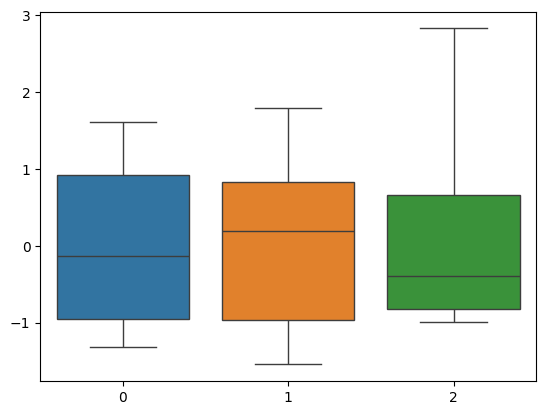

In [ ]:
sns.boxplot(data = scaled_numeric)

In [14]:
!pip install pyod
from pyod.models.knn import KNN

od = KNN(contamination=0.01)
od.fit(scaled_numeric)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=1d24da2011e2c1d1ae5ce5f280ebcbd197521ddb2bf3ce9d78c5b88043734371
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


KNN(algorithm='auto', contamination=0.01, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [15]:
outliers = od.predict(scaled_numeric)
outliers

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
outliers.sum()

51

In [17]:
df2[outliers.astype('bool')]

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
107,9750-BOOHV,32,No,One year,Mailed check,30.15,927.650,No
257,6655-LHBYW,50,Yes,One year,Credit card (automatic),114.35,5791.100,No
440,0771-WLCLA,16,Yes,Month-to-month,Electronic check,112.95,1882.550,No
442,0206-TBWLC,54,Yes,One year,Mailed check,114.65,6049.500,No
488,4472-LVYGI,0,No,Two year,Bank transfer (automatic),52.55,1397.475,No
500,4374-YMUSQ,34,Yes,One year,Credit card (automatic),116.25,3899.050,No
574,6030-REHUX,28,Yes,Month-to-month,Electronic check,110.85,3204.400,No
688,0946-FKYTX,52,No,One year,Mailed check,30.10,1623.400,No
736,6647-ZEDXT,30,Yes,One year,Credit card (automatic),110.45,3327.050,No
753,3115-CZMZD,0,Yes,Two year,Mailed check,20.25,1397.475,No


In [18]:
df_missing = numeric_df.copy()

#Filling missing values with ML

All values going in need to be numeric for this to work

In [23]:
df_missing = numeric_df.copy()
df_missing.loc[df['tenure'] == 39, 'tenure'] = np.nan
#df_missing.head()
#df_missing.info()
df_missing.isna().sum()

,0
tenure,56
MonthlyCharges,0
TotalCharges,0


In [24]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
filled_values = imputer.fit_transform(df_missing)
filled_df = pd.DataFrame(data=filled_values, columns=numeric_df.columns, index=numeric_df.index)

obj_df = df2.select_dtypes(include=['object'])

# merge the two dfs back into one
full_df = pd.concat([filled_df, obj_df], axis=1)
full_df.head()
full_df.info()
full_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   float64
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   float64
 3   customerID      7043 non-null   object 
 4   PhoneService    7043 non-null   object 
 5   Contract        7043 non-null   object 
 6   PaymentMethod   7043 non-null   object 
 7   Churn           7043 non-null   object 
dtypes: float64(3), object(5)
memory usage: 440.3+ KB


,0
tenure,0
MonthlyCharges,0
TotalCharges,0
customerID,0
PhoneService,0
Contract,0
PaymentMethod,0
Churn,0


In [27]:
df2['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [28]:
full_df['tenure'].value_counts()

,count
tenure,
1.0,613
72.0,362
2.0,238
3.0,200
4.0,176
...,...
36.6,1
42.8,1
43.2,1


#Other methods to convert categorical to numeric data

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn_le = le.fit_transform(df2['Churn'])

print(churn_le)
print(le.classes_)

[0 0 1 ... 0 1 0]
['No' 'Yes']


In [32]:
pd.get_dummies(df2['Contract'])

,Month-to-month,One year,Two year
0,True,False,False
1,False,True,False
2,True,False,False
3,False,True,False
4,True,False,False
...,...,...,...
7038,False,True,False
7039,False,True,False
7040,True,False,False
7041,True,False,False


In [31]:
one_hot_df = pd.concat([df2.drop('Contract', axis=1),pd.get_dummies(df2['Contract'], drop_first=True)], axis=1)
print(one_hot_df.head())

   customerID  tenure PhoneService              PaymentMethod  MonthlyCharges  \
0  7590-VHVEG       1           No           Electronic check           29.85   
1  5575-GNVDE      34          Yes               Mailed check           56.95   
2  3668-QPYBK       2          Yes               Mailed check           53.85   
3  7795-CFOCW      45           No  Bank transfer (automatic)           42.30   
4  9237-HQITU       2          Yes           Electronic check           70.70   

   TotalCharges Churn  One year  Two year  
0         29.85    No     False     False  
1       1889.50    No      True     False  
2        108.15   Yes     False     False  
3       1840.75    No      True     False  
4        151.65   Yes     False     False  


#The Yeo-Johnson transform

<Figure size 1200x600 with 0 Axes>

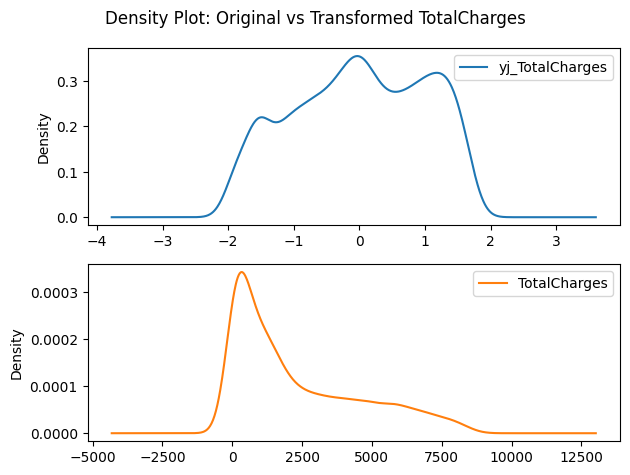

In [35]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df2['yj_TotalCharges'] = pt.fit_transform(df2[['TotalCharges']])

plt.figure(figsize=(12, 6))
df2[['yj_TotalCharges', 'TotalCharges']].plot.density(subplots=True, sharex=False)
plt.suptitle('Density Plot: Original vs Transformed TotalCharges')
plt.tight_layout()
plt.show()